## DIGANTARA - Data Analyst Assignment (EDA)

## Objective
- The objectives of this Exploratory Data Analysis (EDA) on the predicted satellite conjunction dataset are to understand the dataset, identify potential risks and trends in conjunction scenarios, explore relationships between variables, investigate time-based patterns, pinpoint influential features for collision predictions, ensure data quality, and leverage visualizations for effective communication of insights.

## Exploratory Data Analysis(EDA) :

- Exploratory Data Analysis (EDA) is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis. This involves inspecting the dataset from many angles, describing & summarizing it without making any assumptions about its contents.

## Dataset Description
The dataset used for this project consists of the following columns:
- NORAD_CAT_ID_1 : NORAD Catalog Number for the first object.
- OBJECT_NAME_1 : Satellite name for the first object, extracted from the CelesTrak SATCAT.
- DSE_1 : Days since epoch for the first object. This is the time in days from the epoch of the GP data used in the calculation to the calculated time of closest approach (TCA) and is an indication of how accurate the data might be at TCA.
- NORAD_CAT_ID_2 : NORAD Catalog Number for the second object.
- OBJECT_NAME_2 : Satellite name for the second object, extracted from the CelesTrak SATCAT.
- DSE_2	: Days since epoch for the second object. This is the time in days from the epoch of the GP data used in the calculation to the calculated time of closest approach (TCA) and is an indication of how accurate the data might be at TCA.
- TCA : Time of closest approach.
- TCA_RANGE : The distance or range between the two objects at TCA. Often referred to as the minimum range.
- TCA_RELATIVE_SPEED : The magnitude of the relative velocity at TCA. This value provides an indication of the risk (specific kinetic energy) for the two objects if they collided. 
- MAX_PROB : Given fixed spherical object radii and relative distance at the time of closest approach (TCA), the projected covariance ellipse is sized and oriented to produce the maximum probability.
- DILUTION : The standard deviation that produces the maximum probability defines the threshold of dilution. A smaller or larger standard deviation will produce a smaller probability.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Read the data

In [2]:
data=pd.read_csv('sort-minRange.csv')

In [3]:
data

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,51950,OBJECT E [+],2.648,22577,SL-16 DEB [-],3.075,2023-11-09 09:05:36.129,0.028,3.606,5.435000e-03,0.007
1,52569,STARLINK-3927 [+],0.642,37691,FENGYUN 1C DEB [-],4.074,2023-11-07 01:02:40.820,0.035,13.823,1.733000e-02,0.015
2,37166,ZHEDA PIXING 1B [+],5.624,52793,GEESAT 9 [+],5.804,2023-11-12 10:33:14.988,0.036,7.746,2.950000e-03,0.010
3,57139,STARLINK-5355 [+],0.719,28415,CZ-4B R/B [-],0.636,2023-11-07 04:28:09.202,0.041,13.053,1.512000e-03,0.017
4,43181,KANOPUS-V 4 [+],3.922,55072,SPHERE-1 EYE [+],3.934,2023-11-10 16:29:26.589,0.043,14.634,9.881000e-04,0.024
...,...,...,...,...,...,...,...,...,...,...,...
67033,53291,STARLINK-4166 [+],3.387,37084,COSMOS 2251 DEB [-],3.729,2023-11-09 22:45:35.846,5.000,12.826,9.661000e-07,1.939
67034,53757,CENTISPACE-1 S3 [+],1.083,54485,CZ-6A DEB [-],1.103,2023-11-07 15:47:45.234,5.000,9.357,1.430000e-07,1.455
67035,56856,OBJECT L [+],5.253,16719,COSMOS 1743 [?],5.500,2023-11-11 23:10:05.793,5.000,15.153,5.980000e-08,3.480
67036,56867,OBJECT X [+],0.379,31450,FENGYUN 1C DEB [-],0.505,2023-11-07 03:29:33.899,5.000,12.891,1.059000e-07,1.963


- Reading the data into the pandas dataframe is the first step.

## Data Preprocessing

In [4]:
#To display first 10 rows
data.head(10)

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,51950,OBJECT E [+],2.648,22577,SL-16 DEB [-],3.075,2023-11-09 09:05:36.129,0.028,3.606,0.005435,0.007
1,52569,STARLINK-3927 [+],0.642,37691,FENGYUN 1C DEB [-],4.074,2023-11-07 01:02:40.820,0.035,13.823,0.017330,0.015
2,37166,ZHEDA PIXING 1B [+],5.624,52793,GEESAT 9 [+],5.804,2023-11-12 10:33:14.988,0.036,7.746,0.002950,0.010
3,57139,STARLINK-5355 [+],0.719,28415,CZ-4B R/B [-],0.636,2023-11-07 04:28:09.202,0.041,13.053,0.001512,0.017
4,43181,KANOPUS-V 4 [+],3.922,55072,SPHERE-1 EYE [+],3.934,2023-11-10 16:29:26.589,0.043,14.634,0.000988,0.024
5,43816,SPACEBEE-7 [+],6.832,37527,COSMOS 2251 DEB [-],22.916,2023-11-12 23:36:20.921,0.045,13.433,0.001191,0.019
6,39425,APRIZESAT 8 [+],0.858,44881,TIANYAN 01 [+],0.458,2023-11-07 06:47:19.190,0.054,13.002,0.000891,0.022
7,46765,STARLINK-1906 [+],6.999,49397,RAISE 2 [+],6.847,2023-11-13 10:19:01.403,0.054,14.677,0.005652,0.031
8,28371,SAUDISAT 2 [+],0.973,34468,COSMOS 2251 DEB [-],1.270,2023-11-07 18:38:49.098,0.057,14.927,0.000479,0.038
9,41787,PATHFINDER 1 [+],6.129,37569,CZ-4C DEB [-],6.465,2023-11-12 18:05:55.966,0.060,11.250,0.000877,0.020


In [5]:
#To display last 10 rows
data.tail(10)

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
67028,42778,MAX VALIER SAT [+],1.062,57938,STARLINK-30710 [+],1.081,2023-11-07 15:56:30.818,5.0,6.561,1.615000e-07,1.288
67029,43778,SPAWAR-CAL-OR [+],2.580,53062,STARLINK-4311 [+],2.519,2023-11-08 23:38:57.942,5.0,13.216,9.005000e-07,2.080
67030,43793,CSIM-FD [+],4.976,54058,STARLINK-5167 [+],5.267,2023-11-11 17:21:09.684,5.0,14.697,6.518000e-07,2.874
67031,48098,STARLINK-2421 [+],2.506,56749,OBJECT G [+],2.295,2023-11-09 01:28:05.827,5.0,12.599,9.870000e-07,1.898
67032,51866,STARLINK-3553 [+],7.012,51823,CZ-4C R/B [-],6.830,2023-11-13 13:00:55.569,5.0,14.202,7.399000e-07,2.531
67033,53291,STARLINK-4166 [+],3.387,37084,COSMOS 2251 DEB [-],3.729,2023-11-09 22:45:35.846,5.0,12.826,9.661000e-07,1.939
67034,53757,CENTISPACE-1 S3 [+],1.083,54485,CZ-6A DEB [-],1.103,2023-11-07 15:47:45.234,5.0,9.357,1.430000e-07,1.455
67035,56856,OBJECT L [+],5.253,16719,COSMOS 1743 [?],5.500,2023-11-11 23:10:05.793,5.0,15.153,5.980000e-08,3.480
67036,56867,OBJECT X [+],0.379,31450,FENGYUN 1C DEB [-],0.505,2023-11-07 03:29:33.899,5.0,12.891,1.059000e-07,1.963
67037,57031,OBJECT AD [+],7.319,57486,GALASSIA-2 [+],23.019,2023-11-13 21:45:43.129,5.0,11.712,1.214000e-07,1.714


In [6]:
#To see the information aboput the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67038 entries, 0 to 67037
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NORAD_CAT_ID_1      67038 non-null  int64  
 1   OBJECT_NAME_1       67038 non-null  object 
 2   DSE_1               67038 non-null  float64
 3   NORAD_CAT_ID_2      67038 non-null  int64  
 4   OBJECT_NAME_2       67038 non-null  object 
 5   DSE_2               67038 non-null  float64
 6   TCA                 67038 non-null  object 
 7   TCA_RANGE           67038 non-null  float64
 8   TCA_RELATIVE_SPEED  67038 non-null  float64
 9   MAX_PROB            67038 non-null  float64
 10  DILUTION            67038 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 5.6+ MB


In [7]:
#To check if there is any null value
data.isnull().sum()

NORAD_CAT_ID_1        0
OBJECT_NAME_1         0
DSE_1                 0
NORAD_CAT_ID_2        0
OBJECT_NAME_2         0
DSE_2                 0
TCA                   0
TCA_RANGE             0
TCA_RELATIVE_SPEED    0
MAX_PROB              0
DILUTION              0
dtype: int64

In [8]:
#To check if there is any nan value
data.isna().sum()

NORAD_CAT_ID_1        0
OBJECT_NAME_1         0
DSE_1                 0
NORAD_CAT_ID_2        0
OBJECT_NAME_2         0
DSE_2                 0
TCA                   0
TCA_RANGE             0
TCA_RELATIVE_SPEED    0
MAX_PROB              0
DILUTION              0
dtype: int64

In [9]:
#To check the uniques
data.nunique()

NORAD_CAT_ID_1         7799
OBJECT_NAME_1          7665
DSE_1                  7582
NORAD_CAT_ID_2        13092
OBJECT_NAME_2          6785
DSE_2                  9312
TCA                   67005
TCA_RANGE              4805
TCA_RELATIVE_SPEED    12938
MAX_PROB              19838
DILUTION               3457
dtype: int64

In [10]:
#To check duplicates in the dataset
data.duplicated().sum()

0

## Outliers Finding

<Axes: >

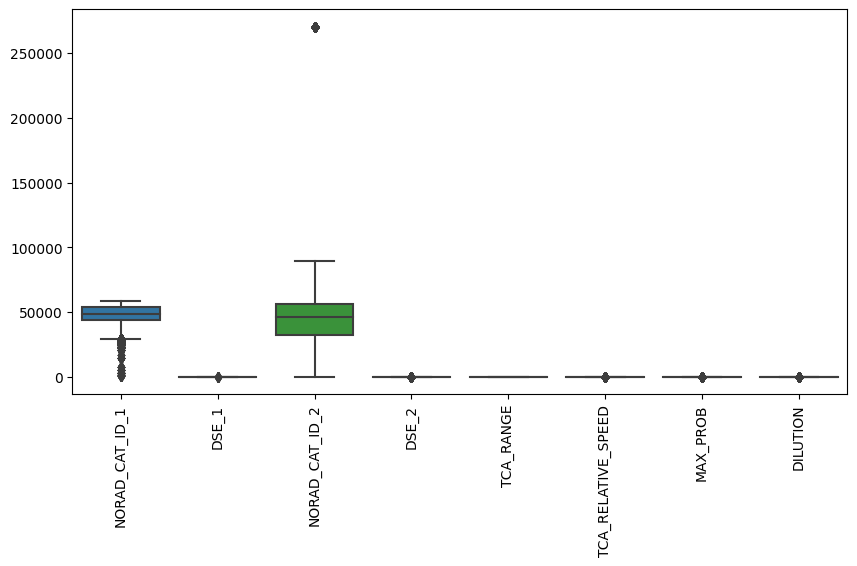

In [11]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(data)

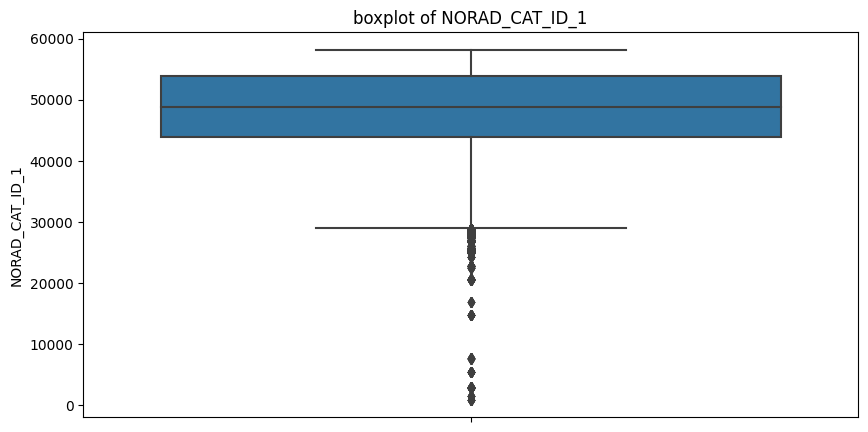

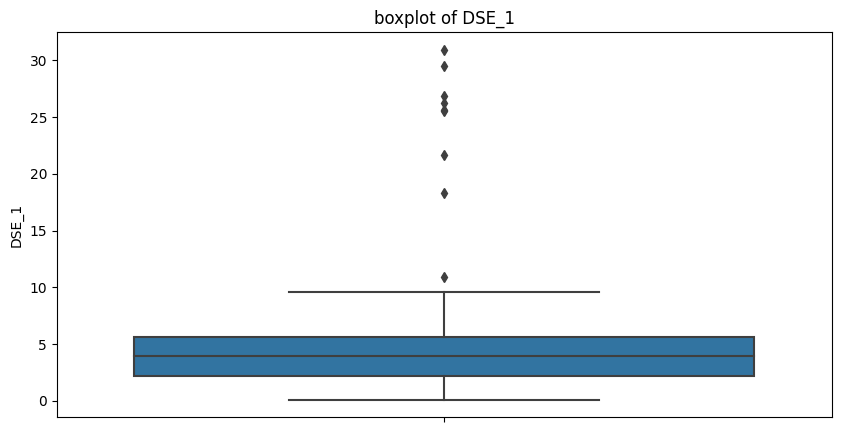

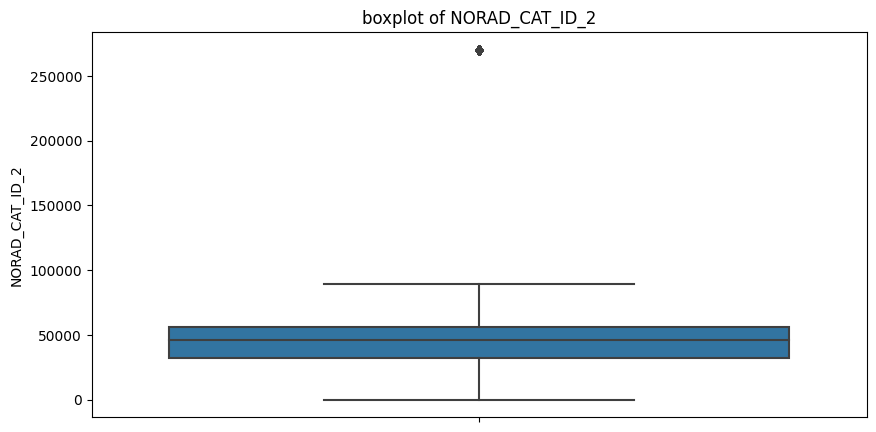

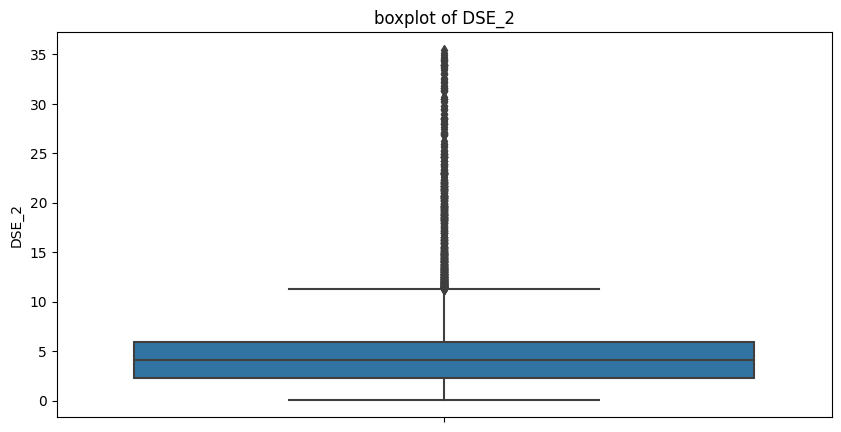

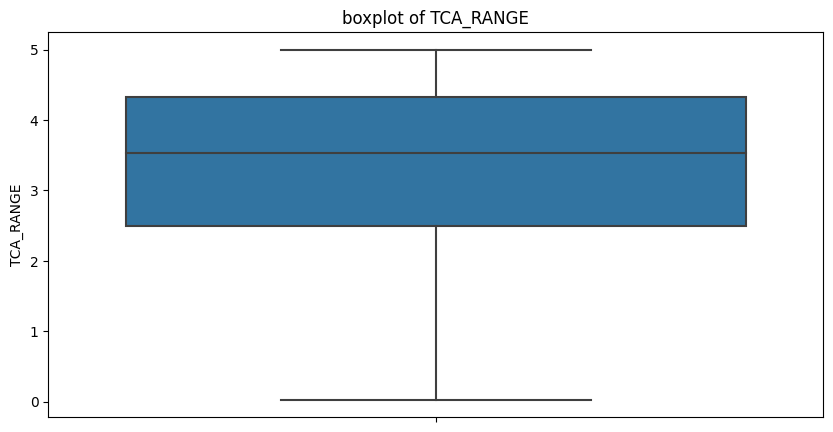

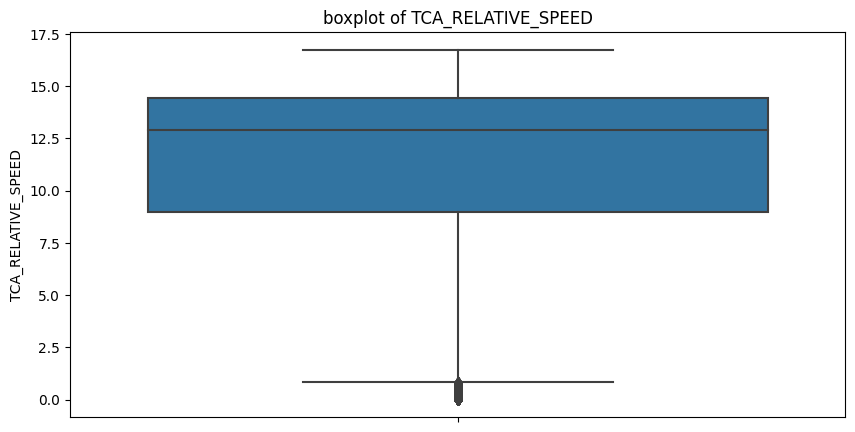

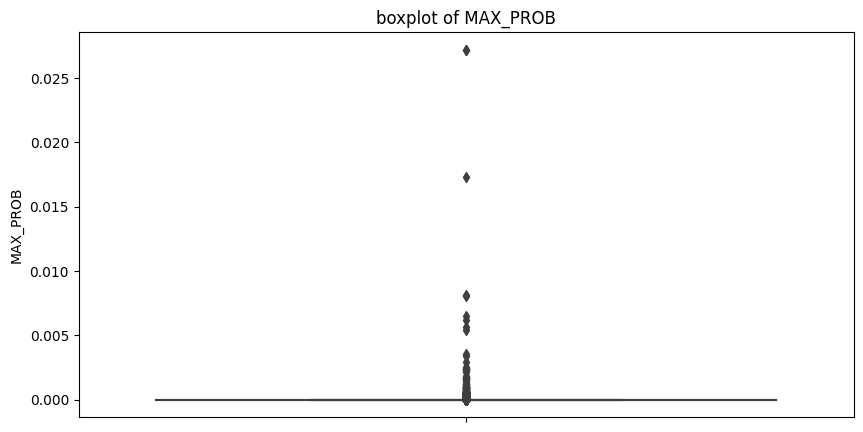

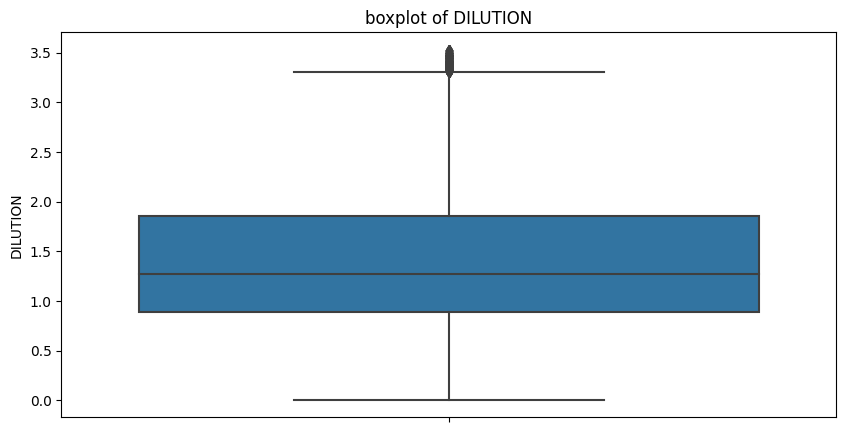

In [12]:
for column in data.columns:
    if data[column].dtype!='object':
        plt.figure(figsize=(10,5))
        sns.boxplot(y=column,data=data)
        plt.ylabel(column)
        plt.title(f'boxplot of {column}')
        plt.show()


- Outliers are those data points that are significantly different from the rest of the dataset that are caused due to experimental error or human error.
- We can find outliers using various methods here we use box plot method to find if there is any outliers in the dataset

## Handling Outliers

In [13]:
#capping method
for column in ['NORAD_CAT_ID_1','DSE_1','NORAD_CAT_ID_2','DSE_2','TCA_RANGE','TCA_RELATIVE_SPEED','MAX_PROB','DILUTION']:
    if data[column].dtype!='object':
        q1=data[column].quantile(0.25)
        q3=data[column].quantile(0.75)
        IQR=q3-q1
        lower_range=q1-(IQR*1.5)
        upper_range=q3+(IQR*1.5)
        data[column]=np.where(data[column]<lower_range,lower_range,
                     np.where(data[column]>upper_range,upper_range,
                     data[column]))

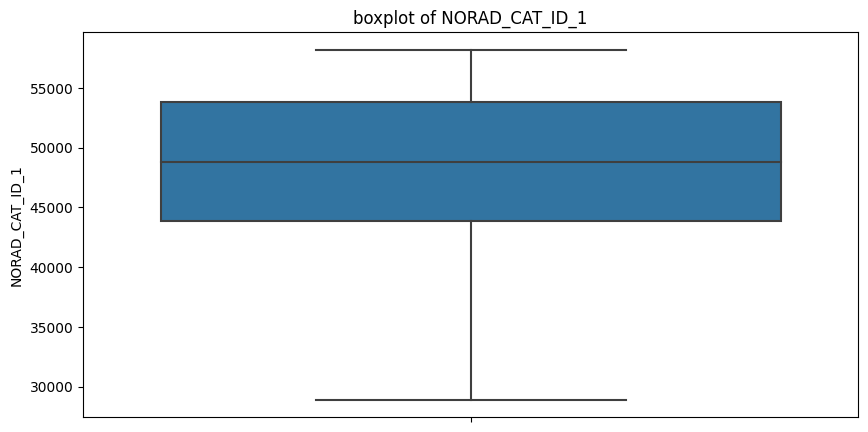

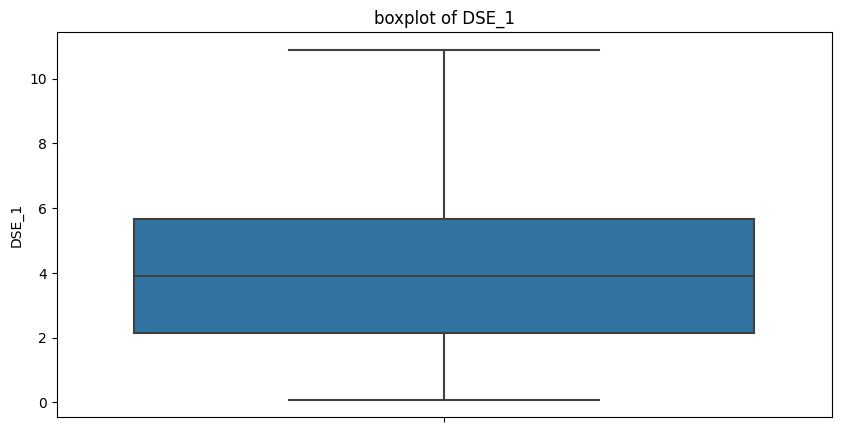

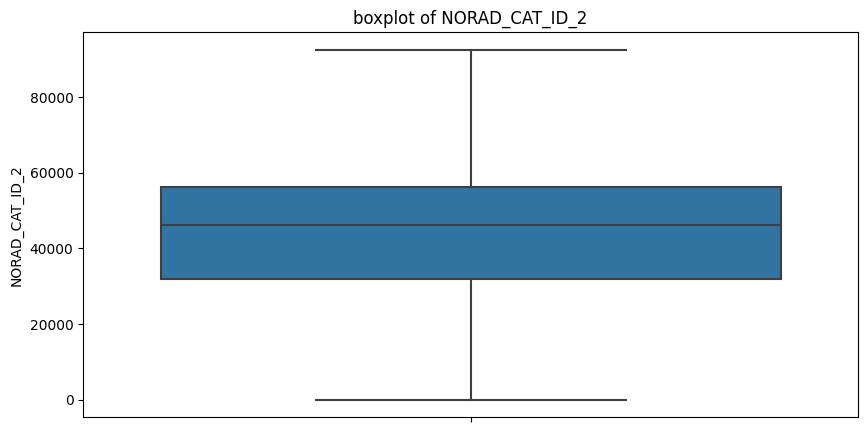

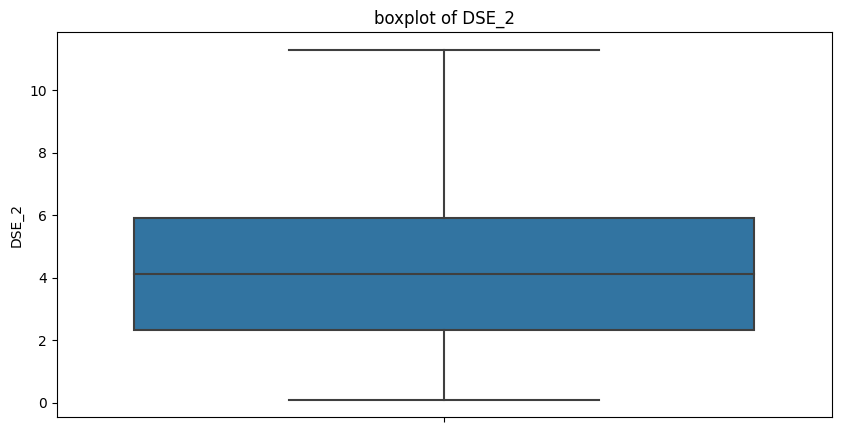

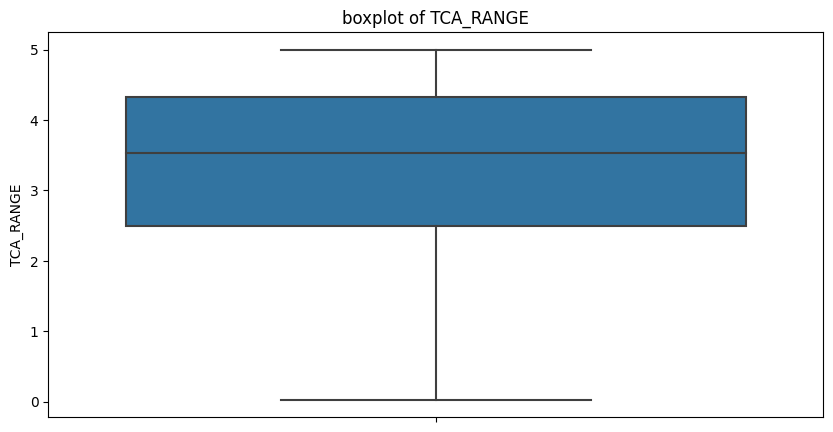

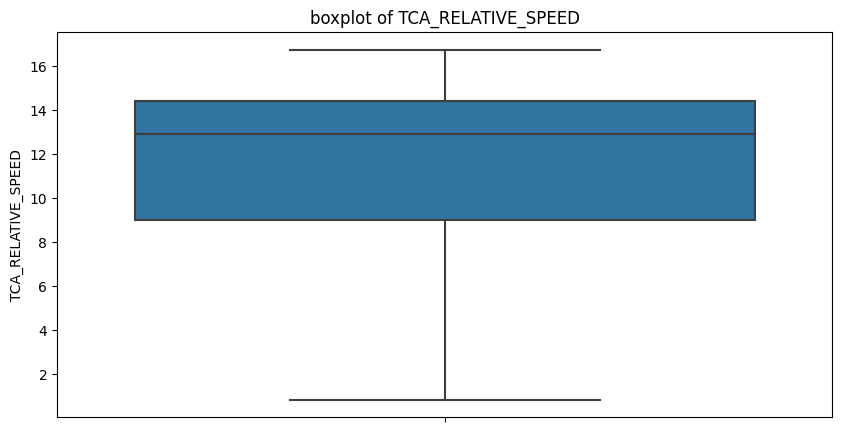

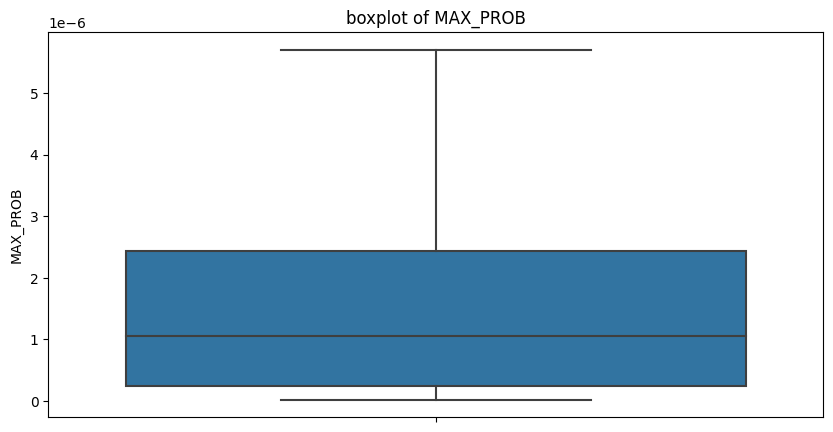

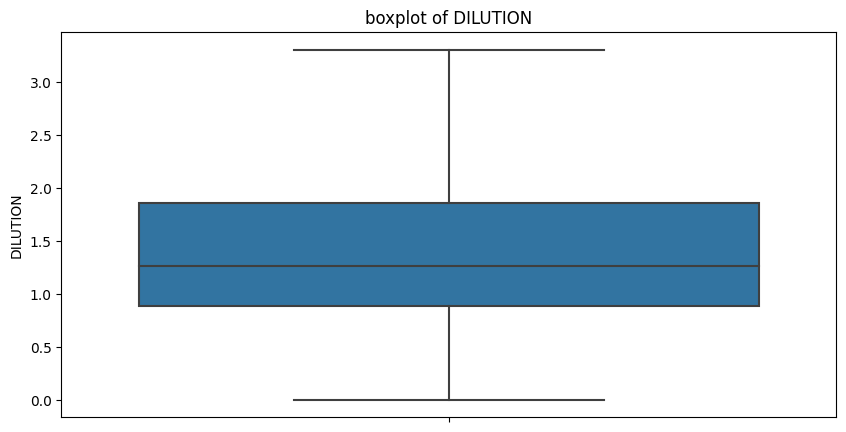

In [14]:
#plotting box plot
for column in ['NORAD_CAT_ID_1','DSE_1','NORAD_CAT_ID_2','DSE_2','TCA_RANGE','TCA_RELATIVE_SPEED','MAX_PROB','DILUTION']:
    if data[column].dtype!='object':
        plt.figure(figsize=(10,5))
        sns.boxplot(y=column,data=data)
        plt.ylabel(column)
        plt.title(f'boxplot of {column}')
        plt.show()

In [15]:
#To describe the data
data.describe()

,NORAD_CAT_ID_1,DSE_1,NORAD_CAT_ID_2,DSE_2,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
count,67038.000000,67038.000000,67038.000000,67038.000000,67038.000000,67038.000000,6.703800e+04,67038.000000
mean,48548.229318,3.902787,42428.411692,4.172815,3.329659,11.403318,1.731312e-06,1.400260
std,6677.282999,2.036934,16254.101159,2.245142,1.175170,3.726686,1.833305e-06,0.707581
min,28924.000000,0.084000,11.000000,0.098000,0.028000,0.854500,2.167000e-08,0.007000
25%,43885.000000,2.152000,31956.000000,2.320000,2.496000,8.995000,2.475000e-07,0.889000
50%,48795.000000,3.900000,46061.000000,4.121000,3.525000,12.900000,1.058500e-06,1.267000
75%,53859.000000,5.651000,56184.000000,5.913000,4.326000,14.422000,2.431000e-06,1.855000
max,58204.000000,10.899500,92526.000000,11.302500,5.000000,16.750000,5.706250e-06,3.304000


## Question 1
- A) Derive high level analytics from the whole data set for a single day. In other
words, derive general analytics of the whole set of conjunction scenarios (for e.g.
number of conjunctions among active satellites). The analytics should be intuitive
and represented in an easily understandable format.

1. Total number of conjunctions on active satellite

In [16]:
#To find the number of conjunctions
total_conjunctions = len(data)
print(f'Total number of conjunctions on active satellites : {total_conjunctions}')

Total number of conjunctions on active satellites : 67038


2. Histogram of TCA range 

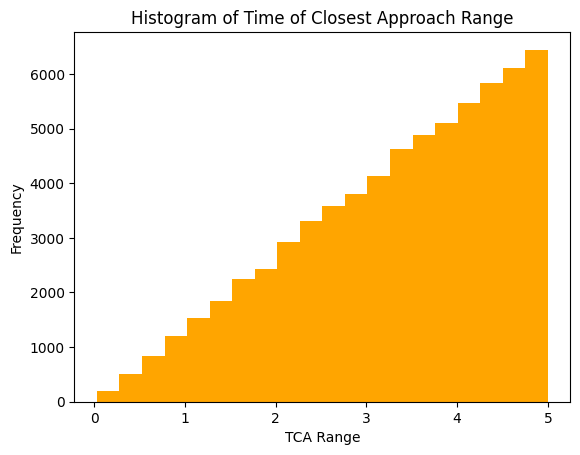

In [17]:
#Visualize 'TCA_RANGE'
plt.hist(data['TCA_RANGE'],bins=20,color='orange')
plt.title('Histogram of Time of Closest Approach Range')
plt.xlabel('TCA Range')
plt.ylabel('Frequency')
plt.show()

- This code creates a histogram that showcases the distribution of 'TCA_RANGE' values in our dataset. 
- It's useful for understanding the distribution and frequency of the time of closest approach range values among the satellite conjunction scenarios in our data. 

5. Histogram of TCA relative speed

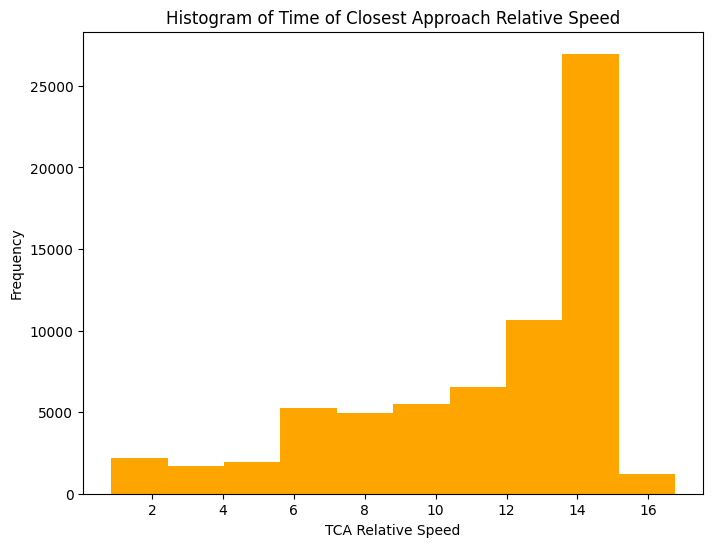

In [18]:
# Visualize TCA relative speed
plt.figure(figsize=(8, 6))
plt.hist(data['TCA_RELATIVE_SPEED'],bins=10,color='orange')
plt.title('Histogram of Time of Closest Approach Relative Speed')
plt.xlabel('TCA Relative Speed')
plt.ylabel('Frequency')
plt.show()

- This code creates a histogram to visualize the distribution of 'TCA_RELATIVE_SPEED' values in our dataset. 

6. Histogram of maximum probability collision

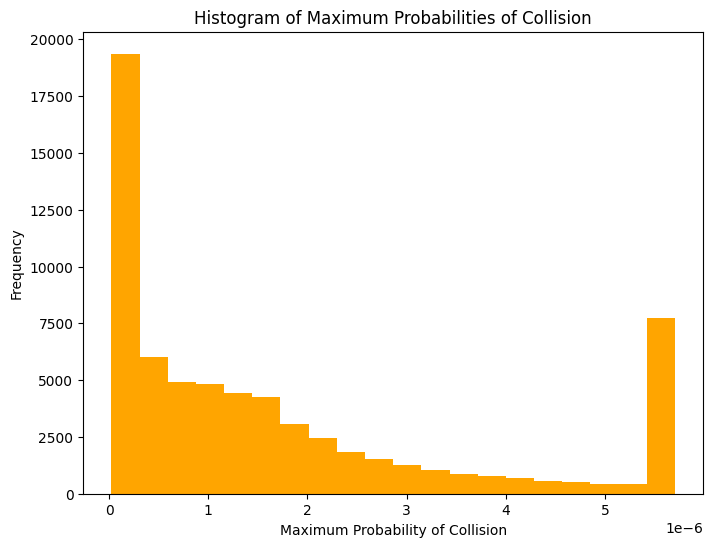

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(data['MAX_PROB'],bins=20,color='orange')
plt.title('Histogram of Maximum Probabilities of Collision')
plt.xlabel('Maximum Probability of Collision')
plt.ylabel('Frequency')
plt.show()

- This code creates a histogram to represent the distribution of 'MAX_PROB' values in our dataset, allowing us to visually understand the frequency and range of maximum collision probabilities present in the data.

7. Relationship between pair plots

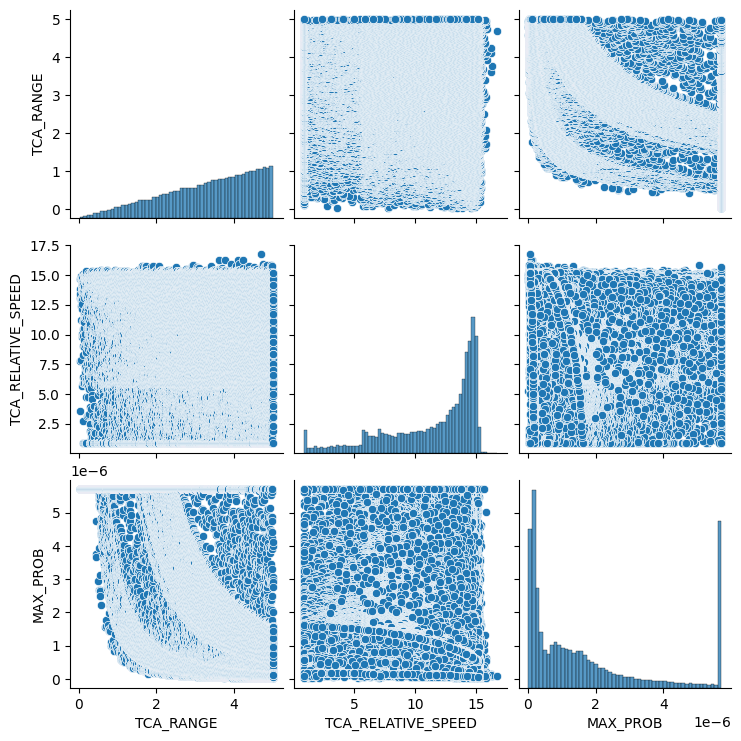

In [20]:
# Select numerical columns for pairplot
numerical_columns = ['TCA_RANGE','TCA_RELATIVE_SPEED','MAX_PROB']

# Pairplot to show relationships between these numerical columns
sns.pairplot(data[numerical_columns])
plt.show()

- The pairplot is a powerful visualization tool to identify patterns, correlations, and distributions between multiple numerical variables in your dataset.
- It helps in understanding how different variables relate to each other, potentially revealing trends, associations, or dependencies between the selected columns. 

8. Correlations between numerical columns 

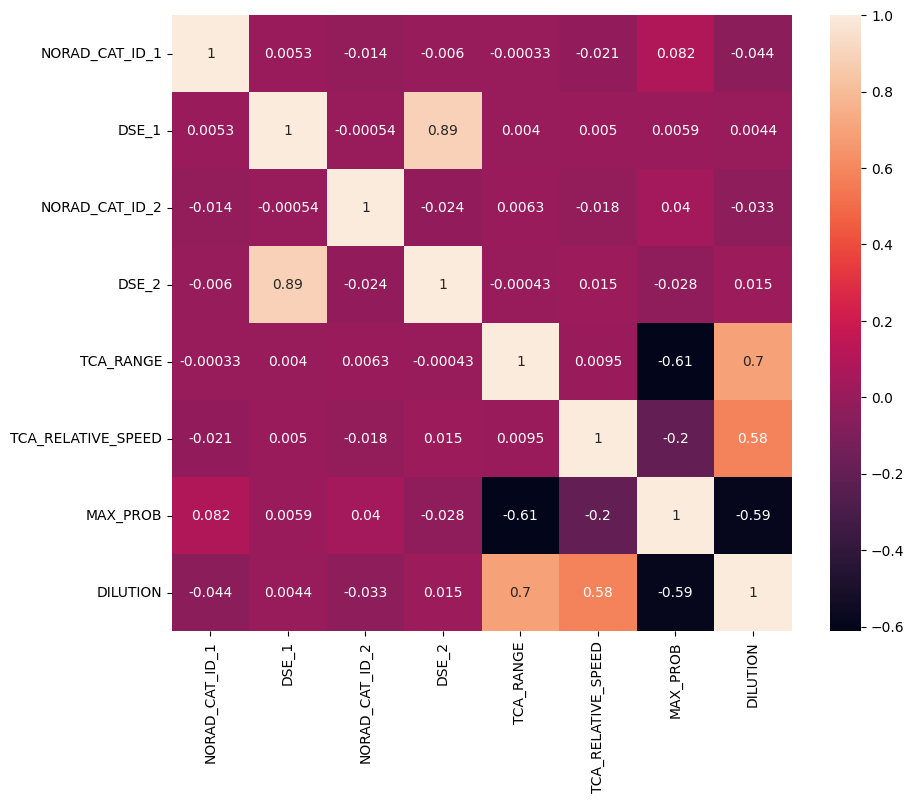

In [21]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True)
plt.show()

- The heatmap visualization of the correlation matrix provides a visual representation of how strongly different numerical columns in the dataset are related. Positive values close to 1 indicate a strong positive correlation, negative values close to -1 indicate a strong negative correlation, and values close to 0 suggest weak or no correlation between columns.

B) Represent the conjunctions data of a single satellite or a satellite constellation.
The analytics should be intuitive, represented in an easily understandable format and
should enable decision making from a satellite operator’s point of view.

1. Timeline of conjunction of single satellite

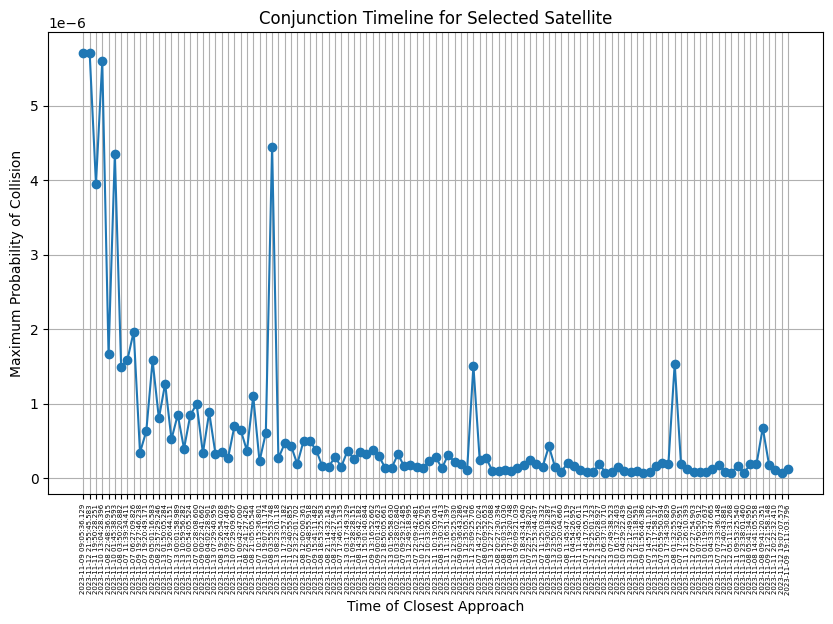

In [22]:
# Assuming 'Satellite_ID' identifies the specific satellite
selected_satellite_data=data[data['OBJECT_NAME_1']=='OBJECT E [+]']

# Plotting timeline of conjunctions
plt.figure(figsize=(10,6))
plt.plot(selected_satellite_data['TCA'],selected_satellite_data['MAX_PROB'],marker='o')
plt.xlabel('Time of Closest Approach')
plt.ylabel('Maximum Probability of Collision')
plt.title('Conjunction Timeline for Selected Satellite')
plt.xticks(rotation=90)
plt.xticks(fontsize=5)
plt.grid(True)
plt.show()

- This code visualizes the conjunction timeline for the specific satellite 'OBJECT E [+]', illustrating how the 'Maximum Probability of Collision' varies concerning the 'Time of Closest Approach' for its respective conjunction events.

## Question 2

- Use the whole dataset that spans about five days. Derive analytics and visualise the
data/analytics accounting for the evolution from the first day (for e.g. the number of
conjunctions of the RSO having NORAD ID 12345 over 7 days of analysis)


1. Total number of conjunctions occuring per day

In [23]:
# Convert 'TCA' to datetime format (if not already in datetime)
data['TCA']=pd.to_datetime(data['TCA'])

# Count the total number of conjunctions per day over the dataset duration
daily_conjunction_counts=data.resample('D', on='TCA').size()

# Display the daily counts of conjunctions
print(daily_conjunction_counts)

TCA
2023-11-07    9652
2023-11-08    9540
2023-11-09    9574
2023-11-10    9590
2023-11-11    9549
2023-11-12    9573
2023-11-13    9560
Freq: D, dtype: int64


2. Visualization of total number of conjunctions occuring per day

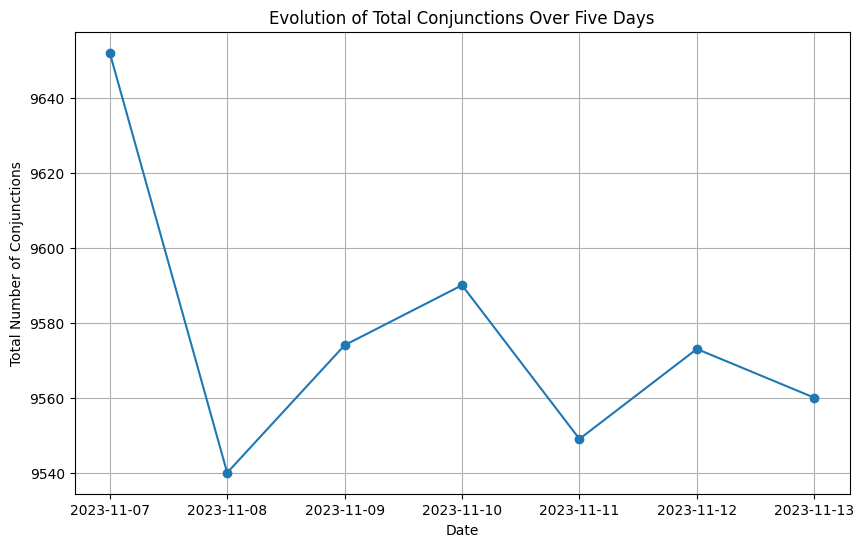

In [24]:
# Convert 'TCA' to datetime format (if not already in datetime)
data['TCA']=pd.to_datetime(data['TCA'])

#copy the orginal data
data_copy=data.copy()

# Set 'TCA' as the index
data_copy=data_copy.set_index('TCA')

# Count the total number of conjunctions per day over the dataset duration
total_conjunctions_per_day=data_copy.resample('D').size()

# Plotting the trend of total conjunctions over the period
plt.figure(figsize=(10, 6))
plt.plot(total_conjunctions_per_day.index, total_conjunctions_per_day.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Total Number of Conjunctions')
plt.title('Evolution of Total Conjunctions Over Five Days')
plt.grid(True)
plt.show()

- This code produces a visualization illustrating the trend in total conjunctions occurring each day over the five-day period, providing insights into the fluctuations and patterns in the frequency of conjunction events within this timeframe.

3. The number of conjunctions of the RSO having NORAD ID 51950 over 7 days of analysis

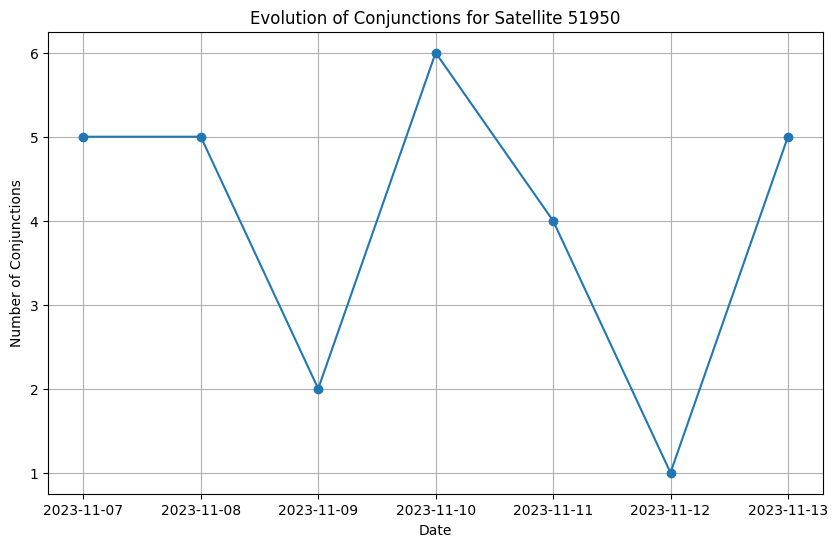

In [25]:
#copy the orginal data
data_copy=data.copy()

#Filter data for a specific satellite
selected_satellite_data=data_copy[data_copy['NORAD_CAT_ID_1']==51950]

#Convert 'TCA' to datetime format (if not already in datetime)
data_copy['TCA']=pd.to_datetime(data_copy['TCA'])

#Set 'TCA' column as the index
selected_satellite_data=selected_satellite_data.set_index('TCA')


#Resample by day and count the number of conjunctions per day
conjunctions_per_day=selected_satellite_data.resample('D').size()

#Plotting the evolution of conjunctions over the period
plt.figure(figsize=(10, 6))
plt.plot(conjunctions_per_day.index, conjunctions_per_day.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Conjunctions')
plt.title('Evolution of Conjunctions for Satellite 51950')
plt.grid(True)
plt.show()

- This code is visualizing the trend of conjunctions for a specific satellite(ie,NORAD_CAT_ID_1'=51950) over time, demonstrating the fluctuation in the number of conjunctions across different days. 